# Homework 1. Попов Николай
* Домашку присылать в виде `.pdf` файла на адрес `homework@merkulov.top`. 
* Дедлайн: **28 марта 22:59**.
* Есть несколько способов конвертировать `.ipynb` в `.pdf`. Самый простой - сохранить ноутбук как `.html`, а затем распечатать это в `.pdf` файл, нажав `ctrl + P` в браузере. 
* Займитесь этим вопросом заранее, чтобы в последний момент не получить из за этого 0 баллов. 
* Все ячейки должны быть запущены, а графики построены.
## Sequence convergence
### Problem 1
Определить скорость сходимости следующих последовательностей:

1. $r_k = \left\{ (0.707)^k \right\}_{k=1}^\infty$
2. $r_k = \left\{ (0.707)^{2^k} \right\}_{k=1}^\infty$
3. $r_k = \left\{ \dfrac{1}{k^2} \right\}_{k=1}^\infty$
4. $r_k = \left\{ \dfrac{1}{k!} \right\}_{k=1}^\infty$
5. $r_k =\begin{cases} \frac{1}{k}, & \mbox{if } k\mbox{ is even} \\ \frac{1}{k^2}, & \mbox{if } k\mbox{ is odd} \end{cases}$
6. $r_k =\begin{cases} \frac{1}{k^k}, & \mbox{if } k\mbox{ is even} \\ \frac{1}{k^{2k}}, & \mbox{if } k\mbox{ is odd} \end{cases}$

####Ответ

1. Линейная по определению
2. Квадратичная по определению
3. Сублинейная по определению
4. Сверхлинейная по ratio test и формуле Стирлинга

$$\lim_{k\rightarrow\infty}\dfrac{r_{k+1}}{r_{k}} = \lim_{k\rightarrow\infty}\dfrac{\sqrt{k}e^{k+1}k^k}{\sqrt{k+1}(k+1)^{k+1}e^k}=\lim_{k\rightarrow\infty}\dfrac{e}{(k+1)\left(1+\frac{1}{k}\right)^k}=\lim_{k\rightarrow\infty}\dfrac{1}{k+1}=0\Rightarrow $$

5. Сублинейная по root test

$$\lim_{k\rightarrow\infty}\sqrt[k]{r_k} = \begin{cases}\lim_{k\rightarrow\infty}\frac{1}{\sqrt[k]{k}} = 1 &, k = 2m \\ \lim_{k\rightarrow\infty}\frac{1}{\sqrt[k]{k^2}} = 1 &, k = 2m+1\end{cases} \Rightarrow \underset{k\rightarrow\infty}{\lim\sup}~{\sqrt[k]{r_k}}=1$$

6. Сверхлинейная аналогично пункту 5
$$\underset{k\rightarrow\infty}{\lim\sup}~{\sqrt[k]{r_k}}=0
$$

## Line search

### Problem 2
Рассмотрите функцию $f(x) = x \cdot e^x + \sin x\cdot e^x, \;\;\; x \in [-20, 0]$ . Рассмотрите методы локализации решения, при которых отрезок $[a,b]$ делится на 2 части в фиксированной пропорции $t: x_t = a + t*(b-a)$ (максимум дважды на итерации - как в методе дихотомии).

Проведите эксперименты при различных значениях $t \in [0,1]$ и постройте график зависимости $N (t)$ - значения количества итераций, необходимых для достижения $\varepsilon$ - точности от параметра $t$. 
Считать $\varepsilon = 10^{-7}$.

Обратите внимание, что в случае $t = 0.5$ данный метод точно совпадает с методом дихотомии.

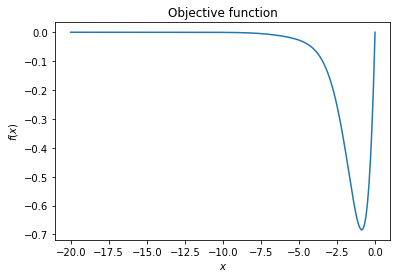

In [0]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

def f_2(x):
    return (x + np.sin(x))*np.exp(x)

x = np.linspace(-20,0, 200)
plt.plot(x, f_2(x))
plt.title('Objective function')
plt.xlabel(f'$x$')
plt.ylabel(f'$f(x)$')
plt.show()

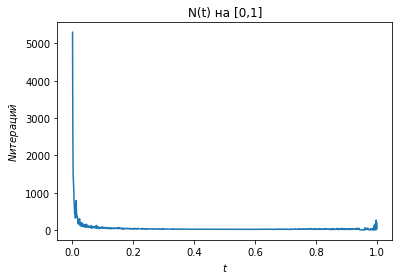

In [0]:
# Решение

def div_search(f, t):
    a = -20
    b = 0
    epsilon = 1e-7
    c = a + t * (b - a)
    N = 0
    while abs(b - a) > epsilon:
        N += 1
        y = a + t * (c - a)
        if f(y) <= f(c):
            b = c
            c = y
        else:
            z = c + t * (b - c)
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
    return N

t_for_x = list(np.linspace(0, 1, 1000))
t_for_x.pop()
t_for_x.pop(0)
N_for_y = [div_search(f_2,t) for t in t_for_x]
plt.plot(t_for_x, N_for_y) 
plt.title('N(t) на [0,1]')
plt.xlabel(f'$t$')
plt.ylabel(f'$N итераций$')
plt.show()


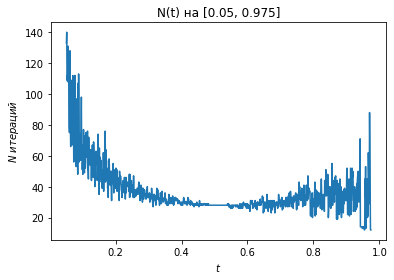

In [0]:
#тут отрезок для t взят немного меньше

t_for_x = list(np.linspace(0.05, 0.975, 1000))
t_for_x.pop()
t_for_x.pop(0)
N_for_y = [div_search(f_2,t) for t in t_for_x]
plt.plot(t_for_x, N_for_y) 
plt.title('N(t) на [0.05, 0.975]')
plt.xlabel(f'$t$')
plt.ylabel(f'$N ~итераций$')
plt.show()


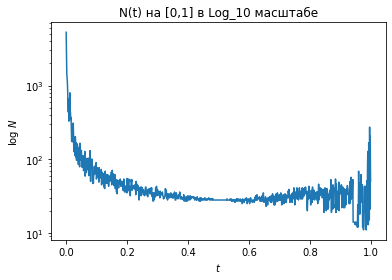

In [0]:
## the same in Logarithmic scale on [0,1]

t_for_x = list(np.linspace(0, 1, 1000))
t_for_x.pop()
t_for_x.pop(0)
N_for_y = [div_search(f_2,t) for t in t_for_x]
plt.semilogy(t_for_x, N_for_y) 
plt.title('N(t) на [0,1] в Log_10 масштабе')
plt.xlabel(f'$t$')
plt.ylabel(f'$\log~N $')
plt.show()


## Zero order methods

### Problem 3
Давайте располагать базовые станции беспроводной сети оптимально!
Пусть у вас есть $N_{obj} = 10$ кластеров из 10 абонентов каждый. Давайте с помощью генетического алгоритма постепенно искать оптимальное количество и расположение базовых станций, чтобы минимизировать стоимость расстановки таких станций.

Ниже представлен один из возможных вариантов реализации генетического алгоритма.

#### Популяция
Это список из массивов размера `[N_stations x 2]`. Каждая особь при этом представляет собой набор координат станций на плоскости. Генерация случайного

#### Мутация
Определяется функцией `mutation()`. Из всех особей выбирается `mutation_rate` часть и к `mutation_rate` части её станций прибавляется случайный Гауссов шум. 
После этого к популяции добавляется особь со случайным количеством станций со случайными координатами.

#### Скрещивание
Определяется функциями `children_creation()` и `breed()`. Двум наборам станций ставится в соответствие третяя станция, из которой взяты четные станции одного родителя и нечетные станции другого.

#### Оценка стоимости особи
Определяется функцией `evaluate_generation()`. Итоговая стоимость, соответствующая конкретной особи складывается из себестоимости построения базовых станций (каждая стоит `station_cost`) за вычетом прибыли от каждого клиента. Прибыль от каждого клиента обратна пропорциональна расстоянию до "своей" базовой станции. Каждый клиент присоединяется только к одной (ближайшей) базовой станции с помощью функции `find_nearest_station()`. Кроме того, прибыль от каждого абонента обратно пропорциональна числу абонентов на данной базовой станции (у каждой станции есть число подсоединенных к ней абонентов `stations_load`). Заметим так же, что, начиная с некоторой близости к абонента к базовой станции, прибыль клиента перестает расти ( в нашем алгоритме она одинакова в радиусе `0.1` от базовой станции, после чего линейно убывает).

Ваша задача состоит в том, чтобы придумать любые модификации к предложенным процедурам в рамках генетического алгоритма так, чтобы итоговое качество работы алгоритма было лучше. Предложите, опишите и протестируйте идеи улучшения алгоритма.

#Решение

Для демонстрации работы покажу запуск на 200 особях в течение 200 поколений

---

#### Предлагемые изменения

* 1) Интервал для координат добавлемых случайных особей в процедуре mutation изменяю с [-1,1] на [x_min, x_max] и  [y_min, y_max]. (это интуитивно понятно) 

  * Ответить на вопросы: 
* 2) Станет ли лучше, если детей будут рожать особи не из произвольной, а из лучшей половины текущего поколения?
* 3) Станет ли лучше, если при мутации не будут добавляться произвольные особи?
* 2+3) Что если попробовать сразу два предыдущих изменения? 



* 4) После ответа на предыдущие вопросы провести поиск по сетке гиперпараметров: доля мутирующих особей, доля мутирующих генов особи (станций в расстановке) и дисперсии мутационного шума для гена. Для каждого параметра возьму дополнительно значение чуть меньше и чуть больше дефолтного. Всего 3\*3\*3 = 27 запусков на одной и той же расстановке абонентов, из них первый запуск дефолтный.

Везде критерий выбора: лучшая особь за 200 итераций.
При этом на левой части картинки адекватное решение и, по ощущениям, предложенное решение - норм.

In [0]:
# Код как был (с исправленными багами)
%matplotlib notebook

import numpy as np
from scipy.spatial.distance import cdist
from random import shuffle, sample
from copy import deepcopy
import random
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import clear_output
import matplotlib.pyplot as plt

#создание случайных координат абонентов
def generate_problem(N_obj, N_abon_per_cluster):
    abonents = np.zeros((N_obj*N_abon_per_cluster,2))
    for i_obj in range(N_obj):
        center = np.random.random(2)
        cov    = np.random.random((2,2))*0.1
        cov    = cov @ cov.T
        xs, ys = np.random.multivariate_normal(center, cov, N_abon_per_cluster).T
        abonents[i_obj*N_abon_per_cluster:(i_obj+1)*N_abon_per_cluster, 0] = xs
        abonents[i_obj*N_abon_per_cluster:(i_obj+1)*N_abon_per_cluster, 1] = ys
    return abonents

#печать точек абонентов на картинку
def plot_problem(abonents):
    plt.figure(figsize=(10,6))
    plt.plot(abonents[:,0], abonents[:,1], 'go')
    plt.title('The village')
#     plt.savefig('bs_problem.svg')
    plt.show()
    
#Создание популяции нужного размера N_solutions из особей случайного размера N_stations в [1,10]
def random_solution(abonents, N_solutions = 100):
    x_min, x_max = abonents[:,0].min(), abonents[:,0].max()
    y_min, y_max = abonents[:,1].min(), abonents[:,1].max()
    population = []
    
    for i_sol in range(N_solutions):
        N_stations = int(np.random.random(1)[0]*10)+1
        stations = np.zeros((N_stations,2))
        stations[:,0], stations[:,1] = np.random.random(N_stations)*(x_max - x_min), np.random.random(N_stations)*(y_max - y_min)
        population.append(stations)
    return population
    
def find_nearest_station(dist_matrix):
    return np.argmin(dist_matrix, axis=1)

def pairwise_distance(abonents, stations):
    return cdist(abonents, stations)
    

#Подсчитать для каждой особи (т.е. расстановки станций) заработанную сумму со знаком минус
def evaluate_generation(abonents, population, station_cost = 1, abonent_profit_base = 1):  
    costs = []
    for creature in population:
        N_stations, N_users = len(creature), len(abonents)
        total_cost          = N_stations*station_cost
        dist_matrix         = pairwise_distance(abonents, creature)
        stations_assignment = find_nearest_station(dist_matrix)
        stations_load       = np.ones(N_stations)
        stations_load       = np.array([1/(sum(stations_assignment == i_st)+1) for i_st, st in enumerate(stations_load)])
        
        for i_ab, abonent in enumerate(abonents):
            dist_to_base = dist_matrix[i_ab, stations_assignment[i_ab]]
            total_cost  -= stations_load[stations_assignment[i_ab]]*abonent_profit_base/(max(0.1, dist_to_base))
        
        costs.append(total_cost)
    return np.array(costs)


#Гипер-параметр mutation_rate это доля мутирующих особей в популяции и доля мутирующих генов особи 
# (ген == координата станции). И добавление новых случайных особей числом не большим числа мутировавших 
def mutation(abonents, population, mutation_rate = 0.3):
    N_creatures = len(population)
    x_min, x_max = abonents[:,0].min(), abonents[:,0].max()
    y_min, y_max = abonents[:,1].min(), abonents[:,1].max()
    mutated_creatures = sample(range(N_creatures), int(mutation_rate*N_creatures))
    for i_mut in mutated_creatures:
        N_stations = len(population[i_mut])
        mutated_stations = sample(range(N_stations), int(mutation_rate*N_stations))
        for i_st_mut in mutated_stations:
            population[i_mut][i_st_mut] += np.random.normal(0, 0.01, 2)
    
    N_new_creatures = max(1, int(random.random()*mutation_rate*N_creatures))
    for i in range(N_new_creatures):
        N_stations = int(np.random.random(1)[0]*10)+1
        new_stations = np.zeros((N_stations,2))
        new_stations[:,0], new_stations[:,1] = np.random.random(N_stations)*(x_max - x_min), np.random.random(N_stations)*(y_max - y_min)
        population.append(new_stations)
    return population

def children_creation(parent1, parent2):
    # whoisbatya
    batya = random.random() > 0.5
    if batya:
        child = np.concatenate((parent1[::2], parent2[1::2]))
    else:
        child = np.concatenate((parent1[1::2], parent2[::2]))
    return np.array(child)

# спаривание случайной половины популяции с двумя соседами каждый -> детей 0,5 от размера популяции
def breed(population):
    new_population = deepcopy(population)
    random.shuffle(new_population)
    N_creatures = len(population)
    for i in range(N_creatures//2):
        children = children_creation(population[i], population[i+1])
        new_population.append(children)
    return new_population

#Выбрать offsprings лучших особей из популяции и лучшую особь
def selection(abonents, population, offsprings = 10):
    scores = evaluate_generation(abonents, population)
    best = np.array(scores).argsort()[:offsprings].tolist()
    return [population[i_b] for i_b in best], population[best[0]] 


def let_eat_bee(N_creatures, N_generations, N_obj = 10, N_abon_per_cluster = 10):
    abonents = generate_problem(N_obj, N_abon_per_cluster)
    
    costs_evolution = np.zeros((N_generations, N_creatures))
    population = random_solution(abonents, N_creatures)
    best_creatures = []
    for generation in range(N_generations):
        population                = mutation(abonents,population)
        population                = breed(population)
        population, best_creature = selection(abonents, population, N_creatures)
        best_creatures.append(best_creature)
        
        costs_evolution[generation, :] = evaluate_generation(abonents, population)

    # Plotting
    x_min, x_max = 0, 1
    y_min, y_max = 0,1
    generation = N_generations - 1            #delete
    cost_min  = [np.min(costs_evolution[i])  for i in range(generation)]
    cost_max  = [np.max(costs_evolution[i])  for i in range(generation)]
    cost_mean = [np.mean(costs_evolution[i]) for i in range(generation)]

    fig = make_subplots(rows=1, cols=2, subplot_titles=("Best solution, default", "Cost function"))
    fig.update_xaxes(title_text="x", range = [x_min,x_max],  row=1, col=1)
    fig.update_yaxes(title_text="y", range = [y_min,y_max], row=1, col=1)
    fig.update_yaxes(title_text="Total cost", row=1, col=2)
    fig.update_xaxes(title_text="Generation", row=1, col=2)

    fig.add_trace(
        go.Scatter(x=abonents[:, 0], y=abonents[:, 1], mode='markers', name='abonents',  marker=dict(size=5)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=best_creatures[generation][:, 0], y=best_creatures[generation][:, 1], mode='markers', name='stations', marker=dict(size=15)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_min, name='best'),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_max, name='worst'),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_mean, name='mean'),
        row=1, col=2
    )

    clear_output(wait=True)
    fig.show()    
    fig.write_html("default_1.html")    
    return costs_evolution, abonents, best_creatures


costs_evolution, common_abonents, best_creatures = let_eat_bee(200, 200)

##Мои добавления к коду (только новые функции)

In [0]:
#Тут код изменен мной. Вопрос 2)

%matplotlib notebook

import numpy as np
from scipy.spatial.distance import cdist
from random import shuffle, sample
from copy import deepcopy
import random
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import clear_output
import matplotlib.pyplot as plt


#БЫЛО - спаривание случайной половины популяции с двумя соседами каждый -> детей 0,5 от размера популяции
#СТАЛО - идея 2)
def my_breed(abonents, population):
    new_population = deepcopy(population)
    N_creatures = len(population)
    best_half_of_population, best_creature = selection(abonents, new_population, N_creatures//2)
    random.shuffle(best_half_of_population)
    for i in range(N_creatures//2 - 1):
        child = children_creation(best_half_of_population[i], best_half_of_population[i+1])
        new_population.append(child)
    new_population.append(children_creation(best_half_of_population[N_creatures//2 - 1], best_half_of_population[0]))
    return new_population


def my_let_eat_bee_2(N_creatures, N_generations, N_obj = 10, N_abon_per_cluster = 10):
    # abonents = generate_problem(N_obj, N_abon_per_cluster)
    abonents = common_abonents
    costs_evolution = np.zeros((N_generations, N_creatures))
    population = random_solution(abonents, N_creatures)
    best_creatures = []
    for generation in range(N_generations):
        population                = mutation(abonents, population)
        population                = my_breed(abonents, population)
        population, best_creature = selection(abonents, population, N_creatures)
        best_creatures.append(best_creature)
        
        costs_evolution[generation, :] = evaluate_generation(abonents, population)
        
    # Plotting
    x_min, x_max = 0, 1
    y_min, y_max = 0,1
    generation = N_generations - 1          #delete
    cost_min  = [np.min(costs_evolution[i])  for i in range(generation)]
    cost_max  = [np.max(costs_evolution[i])  for i in range(generation)]
    cost_mean = [np.mean(costs_evolution[i]) for i in range(generation)]

    fig = make_subplots(rows=1, cols=2, subplot_titles=("Best solution, idea_2", "Cost function"))
    fig.update_xaxes(title_text="x", range = [x_min,x_max],  row=1, col=1)
    fig.update_yaxes(title_text="y", range = [y_min,y_max], row=1, col=1)
    fig.update_yaxes(title_text="Total cost", row=1, col=2)
    fig.update_xaxes(title_text="Generation", row=1, col=2)

    fig.add_trace(
        go.Scatter(x=abonents[:, 0], y=abonents[:, 1], mode='markers', name='abonents',  marker=dict(size=5)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=best_creatures[generation][:, 0], y=best_creatures[generation][:, 1], mode='markers', name='stations', marker=dict(size=15)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_min, name='best'),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_max, name='worst'),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_mean, name='mean'),
        row=1, col=2
    )

    clear_output(wait=True)
    fig.show()
    
    fig.write_html("idea_2.html")    
    return costs_evolution, abonents, best_creatures

costs_evolution_2, abonents, best_creatures_2 = my_let_eat_bee_2(200, 200)

In [0]:
#Тут код изменен мной. Вопрос 3)

%matplotlib notebook

import numpy as np
from scipy.spatial.distance import cdist
from random import shuffle, sample
from copy import deepcopy
import random
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import clear_output
import matplotlib.pyplot as plt


def my_mutation(abonents, population, mutation_rate = 0.3):
    N_creatures = len(population)
    x_min, x_max = abonents[:,0].min(), abonents[:,0].max()
    y_min, y_max = abonents[:,1].min(), abonents[:,1].max()
    mutated_creatures = sample(range(N_creatures), int(mutation_rate*N_creatures))
    for i_mut in mutated_creatures:
        N_stations = len(population[i_mut])
        mutated_stations = sample(range(N_stations), int(mutation_rate*N_stations))
        for i_st_mut in mutated_stations:
            population[i_mut][i_st_mut] += np.random.normal(0, 0.01, 2)
    '''    
    N_new_stations = max(1, int(random.random()*mutation_rate*N_creatures))
    for i in range(N_new_stations):
        new_stations = np.zeros((N_new_stations,2))
        new_stations[:,0] = np.random.random(N_new_stations)*(x_max - x_min)
        new_stations[:,1] = np.random.random(N_new_stations)*(y_max - y_min)
        population.append(new_stations)
    '''        
    return population

def my_let_eat_bee_3(N_creatures, N_generations, N_obj = 10, N_abon_per_cluster = 10):
    # abonents = generate_problem(N_obj, N_abon_per_cluster)
    abonents = common_abonents

    costs_evolution = np.zeros((N_generations, N_creatures))
    population = random_solution(abonents, N_creatures)
    best_creatures = []
    for generation in range(N_generations):
        population                = my_mutation(abonents, population)
        population                = breed(population)
        population, best_creature = selection(abonents, population, N_creatures)
        best_creatures.append(best_creature)
        
        costs_evolution[generation, :] = evaluate_generation(abonents, population)
        
    # Plotting
    x_min, x_max = 0, 1
    y_min, y_max = 0,1
    generation = N_generations - 1          #delete
    cost_min  = [np.min(costs_evolution[i])  for i in range(generation)]
    cost_max  = [np.max(costs_evolution[i])  for i in range(generation)]
    cost_mean = [np.mean(costs_evolution[i]) for i in range(generation)]

    fig = make_subplots(rows=1, cols=2, subplot_titles=("Best solution, idea_3", "Cost function"))
    fig.update_xaxes(title_text="x", range = [x_min,x_max],  row=1, col=1)
    fig.update_yaxes(title_text="y", range = [y_min,y_max], row=1, col=1)
    fig.update_yaxes(title_text="Total cost", row=1, col=2)
    fig.update_xaxes(title_text="Generation", row=1, col=2)

    fig.add_trace(
        go.Scatter(x=abonents[:, 0], y=abonents[:, 1], mode='markers', name='abonents',  marker=dict(size=5)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=best_creatures[generation][:, 0], y=best_creatures[generation][:, 1], mode='markers', name='stations', marker=dict(size=15)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_min, name='best'),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_max, name='worst'),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_mean, name='mean'),
        row=1, col=2
    )

    clear_output(wait=True)
    fig.show()

    fig.write_html("idea_3.html")    
    return costs_evolution, abonents, best_creatures

costs_evolution_3, abonents, best_creatures_3 = my_let_eat_bee_3(200, 200)

In [0]:
#Тут код изменен мной. Вопросы 2) и 3)

%matplotlib notebook

import numpy as np
from scipy.spatial.distance import cdist
from random import shuffle, sample
from copy import deepcopy
import random
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import clear_output
import matplotlib.pyplot as plt


def my_breed(abonents, population):
    new_population = deepcopy(population)
    N_creatures = len(population)
    best_half_of_population, best_creature = selection(abonents, new_population, N_creatures//2)
    random.shuffle(best_half_of_population)
    for i in range(N_creatures//2 - 1):
        child = children_creation(best_half_of_population[i], best_half_of_population[i+1])
        new_population.append(child)
    new_population.append(children_creation(best_half_of_population[N_creatures//2 - 1], best_half_of_population[0]))
    return new_population


def my_mutation(abonents, population, mutation_rate = 0.3):
    N_creatures = len(population)
    x_min, x_max = abonents[:,0].min(), abonents[:,0].max()
    y_min, y_max = abonents[:,1].min(), abonents[:,1].max()
    mutated_creatures = sample(range(N_creatures), int(mutation_rate*N_creatures))
    for i_mut in mutated_creatures:
        N_stations = len(population[i_mut])
        mutated_stations = sample(range(N_stations), int(mutation_rate*N_stations))
        for i_st_mut in mutated_stations:
            population[i_mut][i_st_mut] += np.random.normal(0, 0.01, 2)
    '''    
    N_new_stations = max(1, int(random.random()*mutation_rate*N_creatures))
    for i in range(N_new_stations):
        new_stations = np.zeros((N_new_stations,2))
        new_stations[:,0] = np.random.random(N_new_stations)*(x_max - x_min)
        new_stations[:,1] = np.random.random(N_new_stations)*(y_max - y_min)
        population.append(new_stations)
    '''        
    return population

def my_let_eat_bee_23(N_creatures, N_generations, N_obj = 10, N_abon_per_cluster = 10):
    # abonents = generate_problem(N_obj, N_abon_per_cluster)
    abonents = common_abonents

    costs_evolution = np.zeros((N_generations, N_creatures))
    population = random_solution(abonents, N_creatures)
    best_creatures = []
    for generation in range(N_generations):
        population                = my_mutation(abonents, population)
        population                = my_breed(abonents, population)
        population, best_creature = selection(abonents, population, N_creatures)
        best_creatures.append(best_creature)
        
        costs_evolution[generation, :] = evaluate_generation(abonents, population)
        
    # Plotting
    x_min, x_max = 0, 1
    y_min, y_max = 0,1
    generation = N_generations - 1          #delete
    cost_min  = [np.min(costs_evolution[i])  for i in range(generation)]
    cost_max  = [np.max(costs_evolution[i])  for i in range(generation)]
    cost_mean = [np.mean(costs_evolution[i]) for i in range(generation)]

    fig = make_subplots(rows=1, cols=2, subplot_titles=("Best solution, idea_23", "Cost function"))
    fig.update_xaxes(title_text="x", range = [x_min,x_max],  row=1, col=1)
    fig.update_yaxes(title_text="y", range = [y_min,y_max], row=1, col=1)
    fig.update_yaxes(title_text="Total cost", row=1, col=2)
    fig.update_xaxes(title_text="Generation", row=1, col=2)

    fig.add_trace(
        go.Scatter(x=abonents[:, 0], y=abonents[:, 1], mode='markers', name='abonents',  marker=dict(size=5)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=best_creatures[generation][:, 0], y=best_creatures[generation][:, 1], mode='markers', name='stations', marker=dict(size=15)),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_min, name='best'),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_max, name='worst'),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x = list(range(generation)), y = cost_mean, name='mean'),
        row=1, col=2
    )

    clear_output(wait=True)
    fig.show()

    fig.write_html("idea_23.html")    
    return costs_evolution, abonents, best_creatures

costs_evolution_23, abonents, best_creatures_23 = my_let_eat_bee_23(200, 200)

###Теперь еще четыре картинки - результаты четырех вариатнтов кода выше, но на другой расстановке абонентов (запуск 2 показан под кодом, теперь покажу запуск 1):


#Было (запуск 1 )

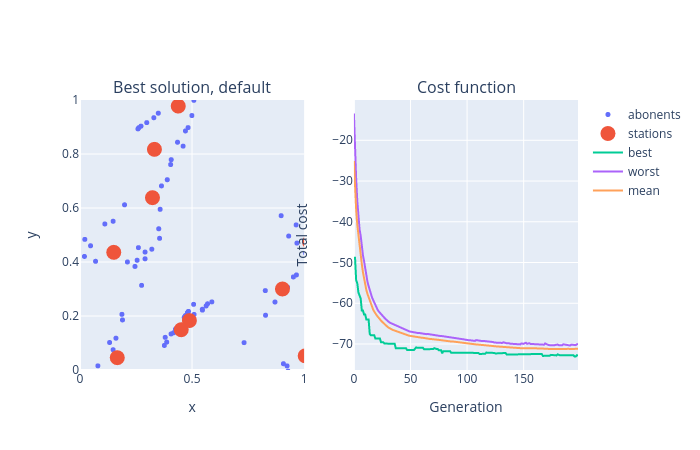

In [0]:
from IPython.display import Image
Image("def_t1.png",unconfined=True)

#Стало -идея 2- запуск 1  

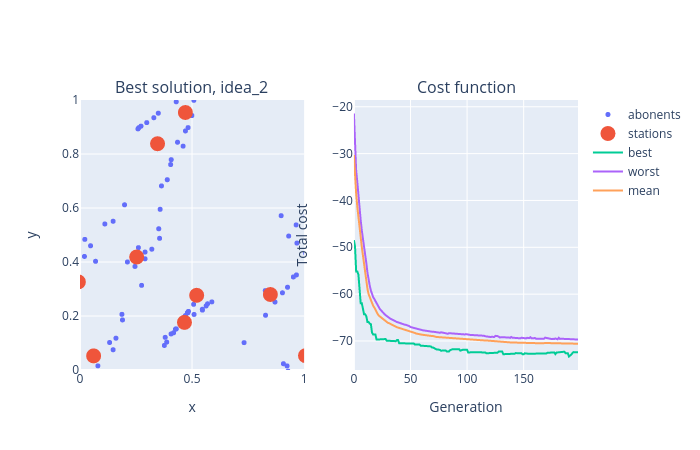

In [0]:
from IPython.display import Image
Image("idea_2_t1.png",unconfined=True)

#Стало -идея 3- запуск 1  

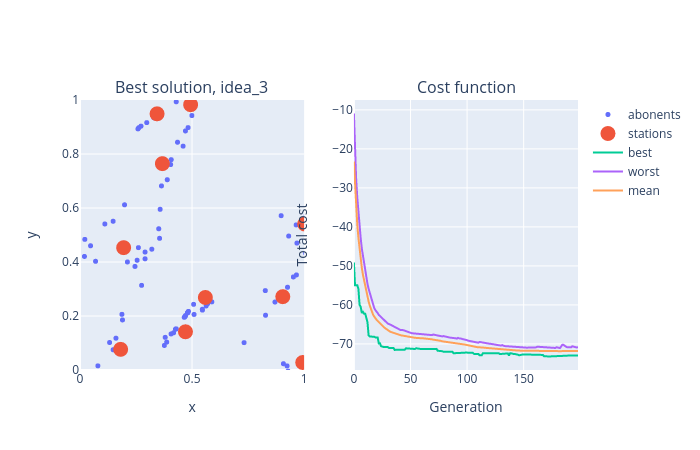

In [0]:
from IPython.display import Image
Image("idea_3_t1.png",unconfined=True)

#Стало -идея 2+3- запуск 1  

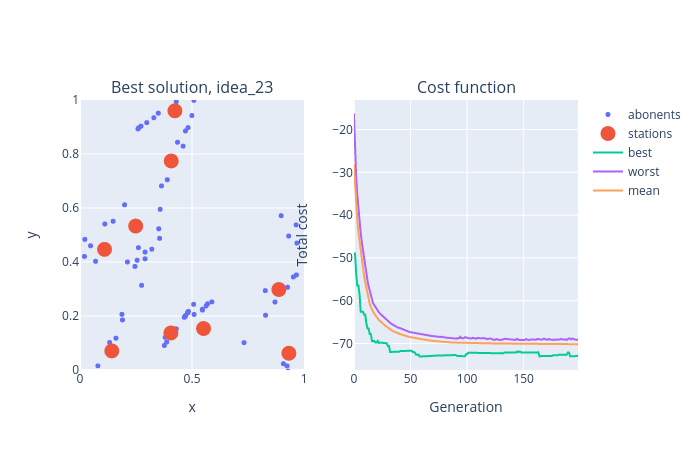

In [0]:
from IPython.display import Image
Image("idea_23_t1.png",unconfined=True)

# Ответы на вопросы 2, 3, 2+3:
  
  реализована проверка этих трех гипотез на двух случайных расположениях абонентов, измененные функции приведены в соответствующих разделах. Сравнивал каждую из трех предложенных модификаций с дефолтным способом на одной и той же расстановке абонентов, всего на двух расстановках. Улучшения не наблюдаются, поэтому далее принципы будут дефолтными. 


#Вопрос 4): 

первый график дефолтный, остальные с измененными параметрами мутации.

In [0]:
%matplotlib notebook

import numpy as np
from scipy.spatial.distance import cdist
from random import shuffle, sample
from copy import deepcopy
import random
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import clear_output
import matplotlib.pyplot as plt


def upgraded_mutation(abonents, population, mutation_creature_rate = 0.3, mutation_gene_rate = 0.3, mutation_deviaton = 0.01):
    N_creatures = len(population)
    x_min, x_max = abonents[:,0].min(), abonents[:,0].max()
    y_min, y_max = abonents[:,1].min(), abonents[:,1].max()
    mutated_creatures = sample(range(N_creatures), int(mutation_creature_rate*N_creatures))
    for i_mut in mutated_creatures:
        N_stations = len(population[i_mut])
        mutated_stations = sample(range(N_stations), int(mutation_gene_rate*N_stations))
        for i_st_mut in mutated_stations:
            population[i_mut][i_st_mut] += np.random.normal(0, mutation_deviaton, 2)
    
    N_new_creatures = max(1, int(random.random()*mutation_creature_rate*N_creatures))
    for i in range(N_new_creatures):
        N_stations = int(np.random.random(1)[0]*10)+1
        new_stations = np.zeros((N_stations,2))
        new_stations[:,0], new_stations[:,1] = np.random.random(N_stations)*(x_max - x_min), np.random.random(N_stations)*(y_max - y_min)
        population.append(new_stations)
    return population


def let_eat_bee(N_creatures, N_generations, N_obj = 10, N_abon_per_cluster = 10):
    abonents = generate_problem(N_obj, N_abon_per_cluster)
    
    creature_rate = [0.3,0.35,0.25]
    gene_rate = [0.3,0.35,0.25]
    deviatons = [0.01,0.015,0.005]

#  Первый запуск - дефолтный
    for cr_rate in creature_rate:
        for g_rate in gene_rate:
            for dev in  deviatons:
                costs_evolution = np.zeros((N_generations, N_creatures))
                population = random_solution(abonents, N_creatures)
                best_creatures = []

                for generation in range(N_generations):
                    population                = upgraded_mutation(abonents, population, cr_rate, g_rate, dev)
                    population                = breed(population)
                    population, best_creature = selection(abonents, population, N_creatures)
                    best_creatures.append(best_creature)
                    
                    costs_evolution[generation, :] = evaluate_generation(abonents, population)

                # Plotting
                x_min, x_max = 0, 1
                y_min, y_max = 0,1
                generation = N_generations - 1            #delete
                cost_min  = [np.min(costs_evolution[i])  for i in range(generation)]
                cost_max  = [np.max(costs_evolution[i])  for i in range(generation)]
                cost_mean = [np.mean(costs_evolution[i]) for i in range(generation)]

                fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Best sol.;par-s: cr_rate, g_rate, dev = {cr_rate},{g_rate},{dev}",
                                                                    "Cost function"))
                fig.update_xaxes(title_text="x", range = [x_min,x_max],  row=1, col=1)
                fig.update_yaxes(title_text="y", range = [y_min,y_max], row=1, col=1)
                fig.update_yaxes(title_text="Total cost", row=1, col=2)
                fig.update_xaxes(title_text="Generation", row=1, col=2)

                fig.add_trace(
                    go.Scatter(x=abonents[:, 0], y=abonents[:, 1], mode='markers', name='abonents',  marker=dict(size=5)),
                    row=1, col=1
                )

                fig.add_trace(
                    go.Scatter(x=best_creatures[generation][:, 0], y=best_creatures[generation][:, 1], mode='markers', name='stations', marker=dict(size=15)),
                    row=1, col=1
                )

                fig.add_trace(
                    go.Scatter(x = list(range(generation)), y = cost_min, name='best'),
                    row=1, col=2
                )

                fig.add_trace(
                    go.Scatter(x = list(range(generation)), y = cost_max, name='worst'),
                    row=1, col=2
                )

                fig.add_trace(
                    go.Scatter(x = list(range(generation)), y = cost_mean, name='mean'),
                    row=1, col=2
                )

                # clear_output(wait=True)
                fig.show()    
                # fig.write_html("default_1.html")    
                # return costs_evolution, abonents, best_creatures


let_eat_bee(200, 200)

Не наблюдаются серьезные улучшения (значение cost function увеличивается примерно на 1.3%, но достигается уже через ~50 поколений).

На параметрах creature_mutation_rate = 0.25; genom_mutation_rate = 0.35; mutation_deviation = 0.01 результаты заметно лучше, чем при исходных (первый график). Но возможно это верно только для конкретной расстановки абонентов, возможно также, что в функции запущенной с этими параметрами начальные случайные особи первого поколения были более удачными в сравнении с таковыми в дефолтном методе. Таким образом, несмотря на приведенный пример, данную гипотезу стоит тестировать на большем числе запусков.


## Gradient descent

### Problem 4
Говорят, что функция принадлежит классу $f \in C^{k,p}_L (Q)$, если она $k$ раз непрерывно дифференцируема на $Q$, а $p$-ая производная имеет константу Липшица $L$. 

$$
\|\nabla^p f(x) - \nabla^p f(y)\| \leq L \|x-y\|, \qquad \forall x,y \in Q
$$

Чаще всего используются $C_L^{1,1}, C_L^{2,2}$ на $\mathbb{R}^n$. 
Заметим, что:
* $p \leq k$
* Если $q \geq k$, то $C_L^{q,p} \subseteq C_L^{k,p}$. Чем выше порядок производной, тем сильнее ограничение (меньшее количество функций принадлежат классу)

1) Докажите, что функция принадлежит к классу $C_L^{2,1} \subseteq C_L^{1,1}$ тогда и только тогда, когда $\forall x \in \mathbb{R}^n$:
$$
\|\nabla^2 f(x)\| \leq L
$$

2) Докажите так же, что последнее условие можно без ограничения общности переписать в виде:

$$
-L I_n \preceq \nabla^2 f(x) \preceq L I_n
$$

Примечание: по умолчанию для векторов используется Евклидова норма, а для матриц - спектральная

РЕШЕНИЕ:

1)

$$(\leftarrow)~~\text{Пусть выполнено}~~ \|\nabla^2 f(x)\| \leq L. \text{Рассмотрим компоненту вектора градиента и введем параметр t}:\\
\dfrac{\partial f}{\partial x_i}(y)-\dfrac{\partial f}{\partial x_i}(x)=\dfrac{\partial f}{\partial x_i}(x+t(y-x))|_{t=1}-\dfrac{\partial f}{\partial x_i}(x+t(y-x))|_{t=0}= \int_0^1{d\left[\dfrac{\partial f}{\partial x_i}(x+t(y-x))\right]}= \int_0^1{\sum_{k=1}^n \dfrac{\partial^2 f}{\partial x_i\partial x_k}(x+t(y-x))d(x_k+t(y_k-x_k))}= \int_0^1{\sum_{k=1}^n \dfrac{\partial^2 f}{\partial x_i\partial x_k}(x+t(y-x))(y_k-x_k)dt}. \text{Если составить из координат}~ \dfrac{\partial f}{\partial x_i}(y)-\dfrac{\partial f}{\partial x_i}(x)~ \text{столбец-вектор, то можно записать подобные  уравнения для}~ i\in\overline{1,n}:~\nabla f(y) - \nabla f(x) = \int_0^1{\nabla^2 f(x+t(y-x))(y-x)dt}=\int_0^1{\nabla^2 f(x+t(y-x))dt}\cdot (y-x)\Rightarrow\\ \Rightarrow \|\nabla f(y) - \nabla f(x)\| = \|\int_0^1{\nabla^2 f(x+t(y-x))dt}\cdot (y-x)\|\leq \|\int_0^1{\nabla^2 f(x+t(y-x))dt}\|\cdot \|y-x\|\leq \int_0^1\|{\nabla^2 f(x+t(y-x))\|dt}\cdot \|y-x\|\leq L\|y-x\|. ~\text{Т.е.}~ f \in C_L^{2,1}. $$


$$
(\rightarrow)~~ \text{Пусть}~ f \in C_L^{2,1} \Rightarrow \forall s\in R^n, \forall a>0\hookrightarrow \|\nabla f(x+as) - \nabla f(x)\|=\|\int_0^a{d\nabla f(x+st)}\| = \|s\cdot \int_0^a{\nabla^2 f(x+st)dt}\|\leq \|s\|\cdot \int_0^a{\|\nabla^2 f(x+st)\|dt}\leq aL\|s\|\Rightarrow \text{разделим на альфа и устремим его к нулю}\Rightarrow\|\nabla^2 f(x)\|\leq L~~ \forall x \in R^n.\\ $$


2)


$$\|\nabla^2 f(x)\| \leq L\Leftrightarrow -L I_n \leq \nabla^2 f(x) \leq L I_n$$
$$ \|\nabla^2f(x)\| = \sqrt{\lambda_{max}\left([\nabla^2 f(x)]^T\nabla^2 f(x)\right)}=|\text{из непрерывной дважды дифференцируемости f следует равенство вторых производных, т.е. симметричность гессиана, отсюда}|= \sqrt{\left[\lambda_{max}\left(\nabla^2 f(x) \right)\right]^2} = |\lambda_{max}\left(\nabla^2 f(x) \right)|\leq L ~~~(1)$$

$$ \nabla ^2 f(x) \leq LI_n \Leftrightarrow \forall z \in R^n \hookrightarrow z^T[LI_n - \nabla^2 f(x)]z \geq 0~~~(*)$$ 

Поскольку матрица Гесса симметричная, то все её собственные значения вещественные, разные и она может быть диагонализуемо (приведением к каноническому виду при переходе в базис из собственнных векторов):
$$\nabla^2 f(x) = S \cdot diag\{\lambda_1,\cdots,\lambda_n\}\cdot S^T\Rightarrow LI_n - \nabla^2 f(x) = LI_n - S \cdot diag\{\lambda_1,\cdots,\lambda_n\}\cdot S^T = LSI_nS^T - S \cdot diag\{\lambda_1,\cdots,\lambda_n\}\cdot S^T = S \cdot [LI_N - diag\{\lambda_1,\cdots,\lambda_n\}]\cdot S^T$$ 

Т.е. матрицу из $(*)$ привели к каноническому виду и при этом диагональные элементы все неотрицательные в силу $(1)$, т.е. она положительно полуопределена, т.е.  $(*)$ верно (переходы осуществлены между равносильными утверждениями, т.е. исходное и конечное утверждения эквивалентны).


Аналогично для 

$$-L I_n \leq \nabla^2 f(x)$$ .





### Problem 5
Покажите, что с помощью следующих стратегий подбора шага в градиентному спуске:
* Постоянный шаг $h_k = \dfrac{1}{L}$
* Убывающая последовательность $h_k = \dfrac{\alpha_k}{L}, \quad \alpha_k \to 0$

можно получить оценку убывания функции на итерации вида:

$$
f(x_k) - f(x_{k+1}) \geq \dfrac{\omega}{L}\|\nabla f(x_k)\|^2
$$
$\omega > 0$ - некоторая константа, $L$ - константа Липщица градиента функции 

#Решение

1) 

$h_k=\dfrac{1}{L};~~ x_{k+1}=x_k-\dfrac{1}{L}\nabla f(x_k)\Rightarrow f(x_k) - f(x_{k+1})=f(x_k)-f\left(x_k-\dfrac{1}{L}\nabla f(x_k)\right)=f(x_k)-\left[ f(x_k) - \dfrac{1}{L}\langle \nabla f(x_k), \nabla f(x_k)\rangle+P_2\right]=\dfrac{1}{L}\| \nabla f(x_k)\|^2-P_2\geq \dfrac{1}{L}\| \nabla f(x_k)\|^2 ~~(w = 1)$


2)

$$ \forall x, y ~~\| \nabla f(y) - \nabla f(x) \| \leq L\|y - x\|\Leftrightarrow \|\nabla^2 f(x)\|\leq L ~\forall x \Leftrightarrow \nabla f(x)\leq LI_n~\forall x\Leftrightarrow \forall z \in R^n\hookrightarrow z^T[LI_n-\nabla^2f(x)]z\geq 0\Leftrightarrow z^T\nabla^2f(x)z\leq z^TLZ=L\|z\|^2~~~(*)$$

$$ h_k = \dfrac{\alpha_k}{L}\Rightarrow f(x_k)-f(x_{k+1})=f(x_k)-f\left[x_k-h_k\nabla f(x_k)\right]=f(x_k)-\left\{f(x_k)+\nabla f(x_k)^T\left(-\dfrac{\alpha_k}{L}\nabla f(x_k)\right)+\dfrac{1}{2}\dfrac{\alpha_k}{L}\nabla f(x_k)^T\nabla^2f(x_k)\dfrac{\alpha_k}{L}\nabla f(x_k)\right\}-P_3\geq \dfrac{\alpha_k}{L}\|\nabla f(x_k)\|^2 - \dfrac{1}{2}\left(\dfrac{\alpha_k}{L}\right)^2L\|\nabla f(x_k)\|^2 = \dfrac{1}{L}\|\nabla f(x_k)\|^2(\alpha_k-0.5\alpha_k^2)$$

Из свойств параболы $y(x) = x(1-0.5x)\geq 0.5$ получаем $$f(x_k)-f(x_{k+1})\geq \dfrac{1}{2L}\|\nabla f(x_k)\|^2 $$.

### Problem 6
Рассмотрим функцию двух переменных:

$$
f(x_1, x_2) = x_1^2 + k x_2^2,
$$

где $k$ - некоторый параметр

In [0]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plot_3d_function(x1, x2, f, title, *f_params, minima = None, iterations = None):
    '''
    '''
    low_lim_1 = x1.min()
    low_lim_2 = x2.min()
    up_lim_1  = x1.max()
    up_lim_2  = x2.max()

    X1,X2 = np.meshgrid(x1, x2) # grid of point
    Z = f((X1, X2), *f_params) # evaluation of the function on the grid
    
    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=(16,7))
    fig.suptitle(title)

    #===============
    #  First subplot
    #===============
    # set up the axes for the first plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    # plot a 3D surface like in the example mplot3d/surface3d_demo
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, 
                          cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, f(minima_), 'r*', markersize=10)
    
    

    #===============
    # Second subplot
    #===============
    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2)

    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    im = ax.imshow(Z,cmap=plt.cm.RdBu,  extent=[low_lim_1, up_lim_1, low_lim_2, up_lim_2])
    cset = ax.contour(x1, x2,Z,linewidths=2,cmap=plt.cm.Set2)
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    fig.colorbar(im)
    ax.set_xlabel(f'$x_1$')
    ax.set_ylabel(f'$x_2$')
    
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, 'r*', markersize=10)
    
    if iterations is not None:
        for point in iterations:
            ax.plot(*point, 'go', markersize=3)
        iterations = np.array(iterations).T
        ax.quiver(iterations[0,:-1], iterations[1,:-1], iterations[0,1:]-iterations[0,:-1], iterations[1,1:]-iterations[1,:-1], scale_units='xy', angles='xy', scale=1, color='blue')

    plt.show()

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def f_6(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    x_1, x_2 = x
    return x_1**2 + k*x_2**2

def df_6(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    return np.array([2*x[0], 2*k*x[1]])

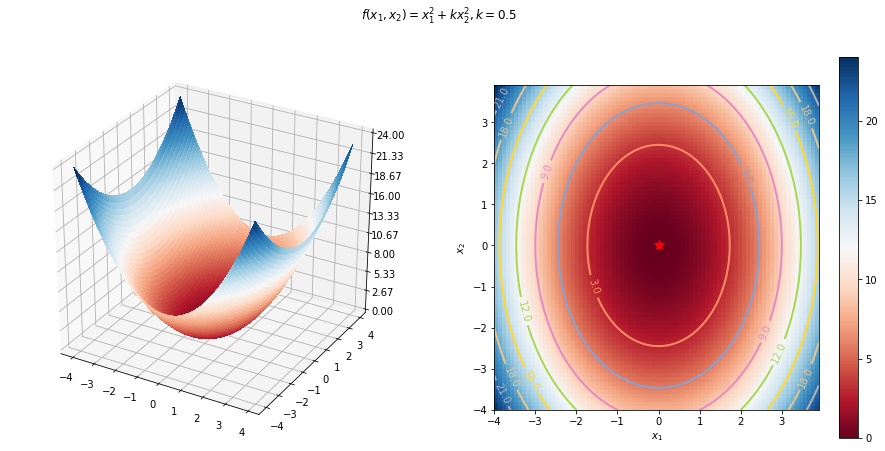

In [0]:
up_lim  = 4
low_lim = -up_lim
x1 = np.arange(low_lim, up_lim, 0.1)
x2 = np.arange(low_lim, up_lim, 0.1)
k=0.5
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'

plot_3d_function(x1, x2, f_6, title, k, minima=[0,0])

Для наглядности можете пользоваться кодом отрисовки окружающих картинок

Finished with 20 iterations


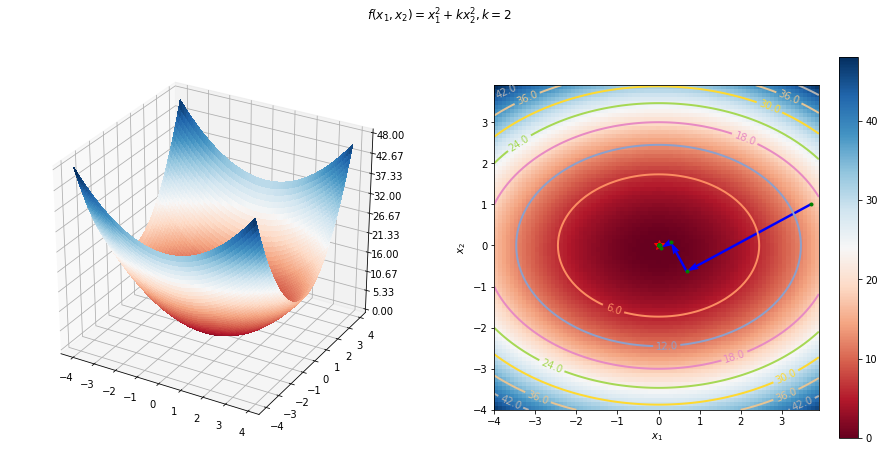

In [0]:
from scipy.optimize import minimize_scalar

def steepest_descent(x_0, f, df, df_eps = 1e-2, max_iter = 1000000):
    iterations = []
    x = np.array(x_0)
    iterations.append(x)
    while np.linalg.norm(df(x)) > df_eps and len(iterations) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x)))
        alpha_opt = res.x
        x = x - alpha_opt * df(x)
        iterations.append(x)
    print(f'Finished with {len(iterations)} iterations')
    return iterations

x_0 = [3.7,1]
iterations = steepest_descent(x_0, f_6, df_6, df_eps = 1e-9)
k = 2
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'

plot_3d_function(x1, x2, f_6, title, k, minima=[0,0], iterations = iterations)

Постройте график количества итераций, необходимых для сходимости алгоритма наискорейшего спуска (до выполнения условия $\|\nabla f(x_k)\| \leq \varepsilon = 10^{-7}$) в зависимости от значения $k$. Рассмотрите интервал $k \in [10^{-3}; 10^3]$ (будет удобно использовать функцию `ks = np.logspace(-3,3)`) и строить график по оси абсцисс в логарифмическом масштабе `plt.semilogx()` или `plt.loglog()` для двойного лог. масштаба.


Тут можно изменить начальную точку x_0

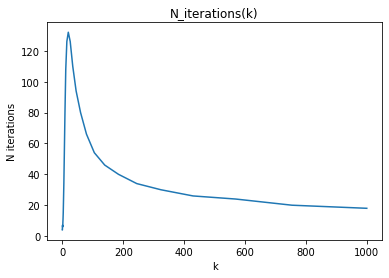

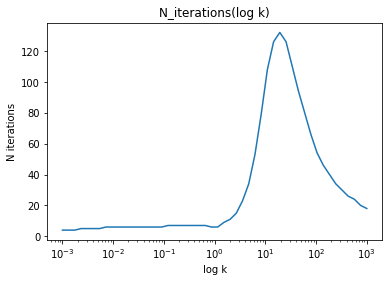

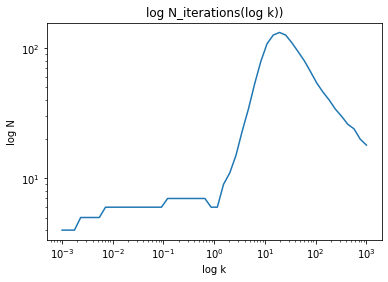

In [0]:

def my_steepest_descent(x_0, f, df, *f_params, df_eps = 1e-2, max_iter = 10000000):
    steps = []
    x = np.array(x_0)
    steps.append(x)
    while np.linalg.norm(df(x, *f_params)) > df_eps and len(steps) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x, *f_params), *f_params))
        alpha_opt = res.x
        x = x - alpha_opt * df(x, *f_params)
        steps.append(x)
    return steps, len(steps)

x_0 = [10,1]  #<--------------

steps_for_each_k = []
num_of_iterations = []

for k in np.logspace(-3,3): 
    a, b = my_steepest_descent(x_0, f_6, df_6, float(k), df_eps = 1e-7) 
    steps_for_each_k.append(a)
    num_of_iterations.append(b)

plt.plot( list(np.logspace(-3,3)) , num_of_iterations ) 
plt.title('N_iterations(k)')
plt.xlabel('k')
plt.ylabel('N iterations')
plt.show()

plt.semilogx( list(np.logspace(-3,3)) , num_of_iterations ) 
plt.title('N_iterations(log k)')
plt.xlabel('log k')
plt.ylabel('N iterations')
plt.show()

plt.loglog(list(np.logspace(-3,3)) , num_of_iterations)
plt.title('log N_iterations(log k))')
plt.xlabel('log k')
plt.ylabel('log N')
plt.show()



#Визуализация шагов самого долгого и быстрого спусков

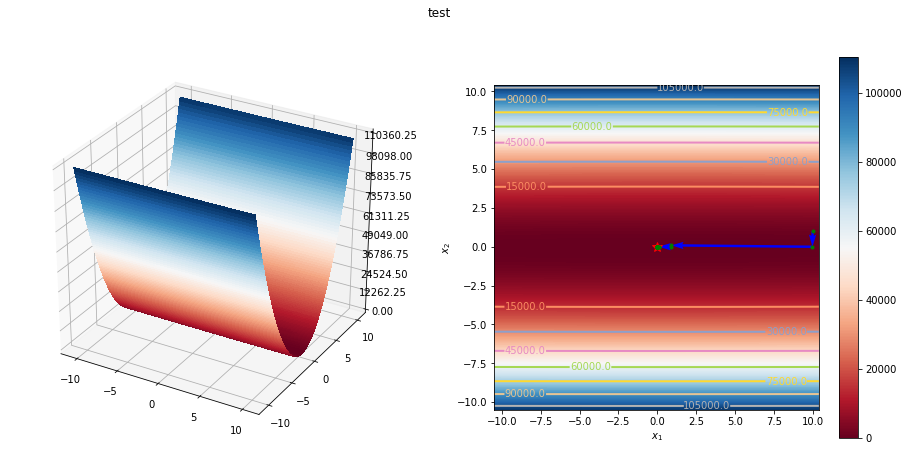

18  iterations
 k =  1000


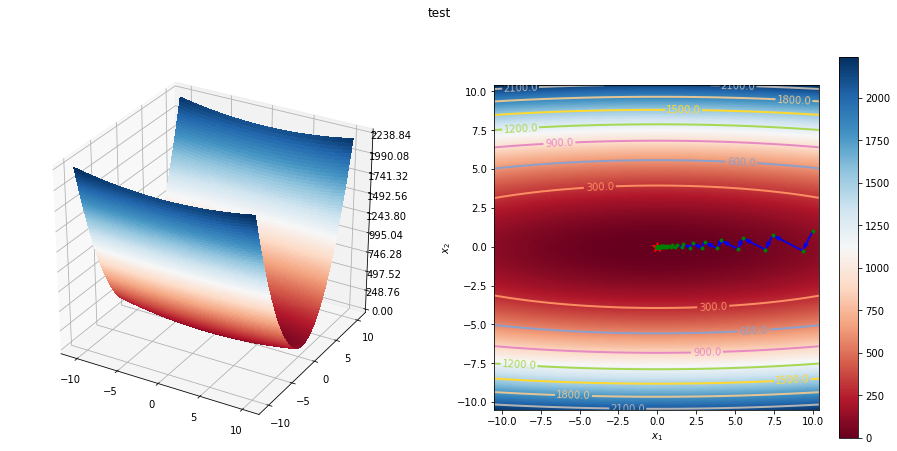

max 132  iterations
 k =  19.306977288832496


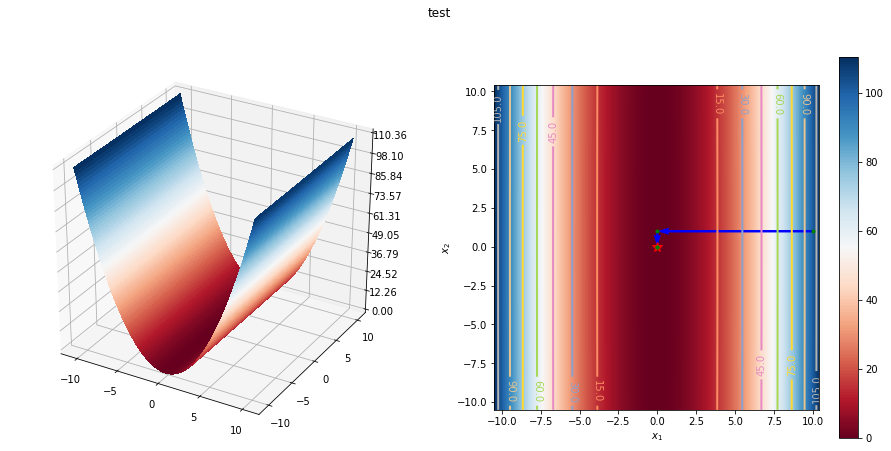

min 4  iterations
 k =  0.001


In [0]:
up_lim  = max(x_0) + 0.5
low_lim = -up_lim
x1 = np.arange(low_lim, up_lim, 0.1)
x2 = np.arange(low_lim, up_lim, 0.1)
title = 'test'


plot_3d_function(x1, x2, f_6, title, 1000, minima=[0,0], 
                 iterations = steps_for_each_k[-1])
print(len(steps_for_each_k[-1]),' iterations\n', 'k = ', 1000)


plot_3d_function(x1, x2, f_6, title, np.logspace(-3,3)[np.argmax(num_of_iterations)], minima=[0,0], 
                 iterations = steps_for_each_k[np.argmax(num_of_iterations)])
print('max', len(steps_for_each_k[np.argmax(num_of_iterations)]),' iterations\n','k = ', np.logspace(-3,3)[np.argmax(num_of_iterations)])


plot_3d_function(x1, x2, f_6, title, np.logspace(-3,3)[np.argmin(num_of_iterations)], minima=[0,0], 
                 iterations = steps_for_each_k[np.argmin(num_of_iterations)])
print('min', len(steps_for_each_k[np.argmin(num_of_iterations)]),' iterations\n', 'k = ', np.logspace(-3,3)[np.argmin(num_of_iterations)])


##Объяснение полученной зависимости:


Метод сходится быстро при сильно сплюснутых параболоидах, поскольку вторая точка попадает на параболу (т.е. сечение), почти что проходящую через точку минимума функции.

Если же параболоид сплюснут не сильно, то при итерациях парабола, по которой производится минимизация шага, не проходит через точку минимума параболоида и для достижения точности нужно много итераций.



Сделайте те же графики для функции:

$$
f(x) = \ln(1 + e^{x^\top A x}) + \mathbf{1}^\top x
$$


In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def f_7(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    x_1, x_2 = x
    return np.log(1 + np.exp(x_1**2 + k*x_2**2)) + x_1 + x_2 

def df_7(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    x_1, x_2 = x
    return np.array([1 + (2* x_1 * np.exp(x_1**2 + k*x_2**2) ) / (1 + np.exp(x_1**2 + k*x_2**2) ), 
                          1 + (2* k * x_2 * np.exp(x_1**2 + k*x_2**2) ) / (1 + np.exp(x_1**2 + k*x_2**2) )])
    

def my_steepest_descent(x_0, f, df, *f_params, df_eps = 1e-2, max_iter = 10000):
    steps = []
    x = np.array(x_0)
    steps.append(x)
    while np.linalg.norm(df(x, *f_params)) > df_eps and len(steps) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x, *f_params), *f_params))
        alpha_opt = res.x
        x = x - alpha_opt * df(x, *f_params)
        steps.append(x)
    return steps, len(steps)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1986: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


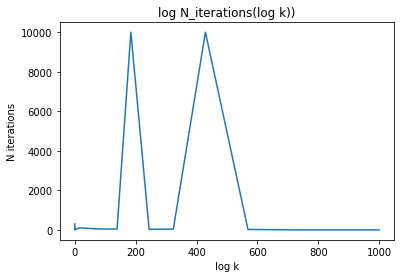

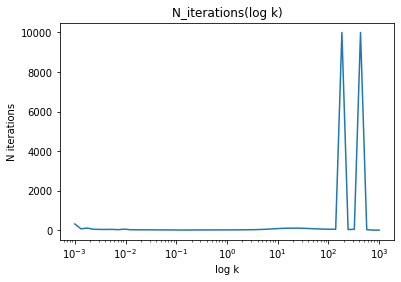

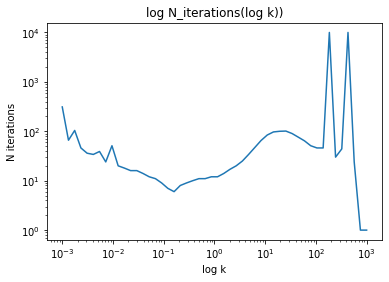

In [0]:

x_0 = [10, 1]
steps_for_each_k = []
num_of_iterations = []

for k in np.logspace(-3,3): 
    a, b = my_steepest_descent(x_0, f_7, df_7, float(k), df_eps = 1e-7) 
    steps_for_each_k.append(a)
    num_of_iterations.append(b)

plt.plot(list(np.logspace(-3,3)) , num_of_iterations)
plt.title('log N_iterations(log k))')
plt.xlabel('log k')
plt.ylabel('N iterations')
plt.show()

plt.semilogx( list(np.logspace(-3,3)) , num_of_iterations ) 
plt.title('N_iterations(log k)')
plt.xlabel('log k')
plt.ylabel('N iterations')
plt.show()

plt.loglog(list(np.logspace(-3,3)) , num_of_iterations)
plt.title('log N_iterations(log k))')
plt.xlabel('log k')
plt.ylabel('N iterations')
plt.show()

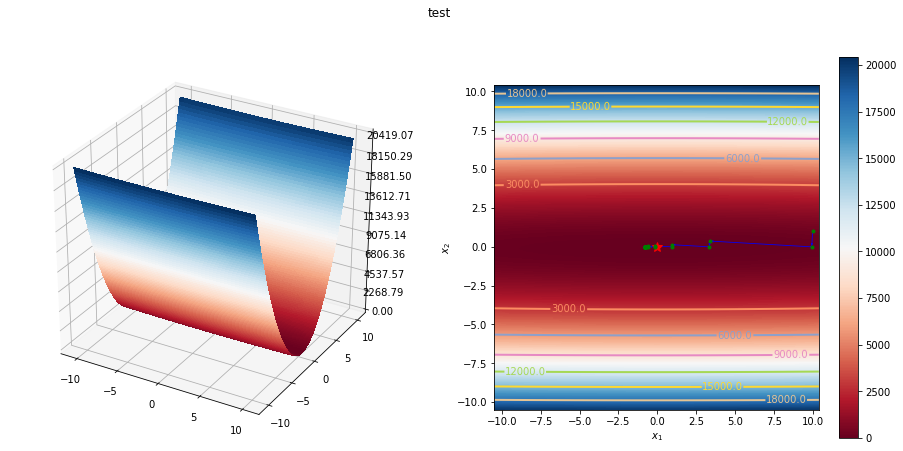

max 10001  iterations
 k =  184.20699693267164


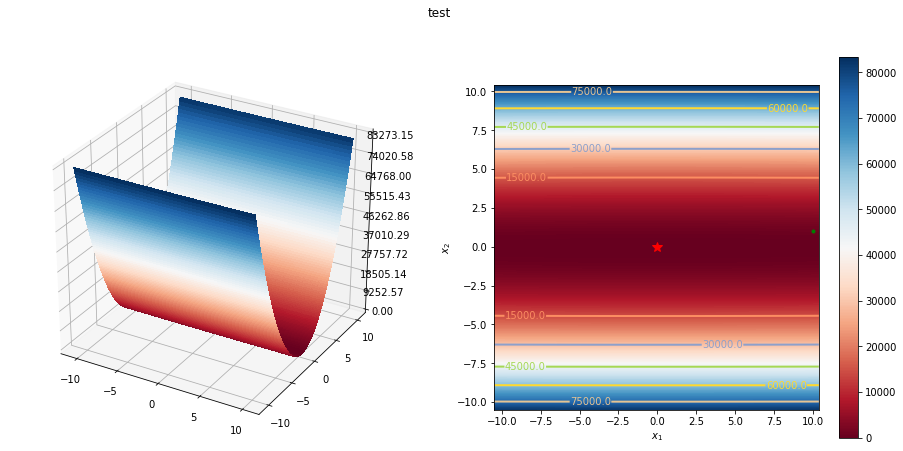

min 1  iterations
 k =  754.3120063354608


In [0]:
up_lim  = max(x_0) + 0.5
low_lim = -up_lim
x1 = np.arange(low_lim, up_lim, 0.1)
x2 = np.arange(low_lim, up_lim, 0.1)
title = 'test'


plot_3d_function(x1, x2, f_6, title, np.logspace(-3,3)[np.argmax(num_of_iterations)], minima=[0,0], 
                 iterations = steps_for_each_k[np.argmax(num_of_iterations)])
print('max', len(steps_for_each_k[np.argmax(num_of_iterations)]),' iterations\n','k = ', np.logspace(-3,3)[np.argmax(num_of_iterations)])


plot_3d_function(x1, x2, f_6, title, np.logspace(-3,3)[np.argmin(num_of_iterations)], minima=[0,0], 
                 iterations = steps_for_each_k[np.argmin(num_of_iterations)])
print('min', len(steps_for_each_k[np.argmin(num_of_iterations)]),' iterations\n', 'k = ', np.logspace(-3,3)[np.argmin(num_of_iterations)])